In [1]:
import numpy as np
import matplotlib.pyplot as plt

%pylab inline
plt.style.use('seaborn')

Populating the interactive namespace from numpy and matplotlib


In [2]:
def erk4(u, tau, M, mass, G, f):
    for m in range(M):
        w_1 = f(u[m], mass, G)
        w_2 = f(u[m] + tau*1/2*w_1, mass, G)
        w_3 = f(u[m] + tau*1/2*w_2, mass, G)
        w_4 = f(u[m] + tau*w_3, mass, G)
        u[m + 1] = u[m] + tau*(1/6*w_1 + 1/3*w_2 + 1/3*w_3 + 1/6*w_4)
        
    return u

In [3]:
def modeling(u, mass, G):
    f = np.zeros(4)
    R3 = np.sqrt(u[0]**2 + u[1]**2)**3
    f[0] = u[2]
    f[1] = u[3] 
    f[2] = -G*mass*u[0]/R3
    f[3] = -G*mass*u[1]/R3
    return f

def plot_trajectory(x, y, name='Earth'):
    plt.figure(figsize=(16, 5))
    plt.plot(x, y)
    plt.plot([0], [0], '-o', color='orange')
    plt.xlabel('X, m'); plt.ylabel('Y, m')
    plt.grid(1)
    plt.suptitle(f'Trajectory of {name}')
    plt.show()

In [4]:
Mass = 1.989*10**30 
G = 6.67*10**(-11)

In [5]:
def richerdson_simple(M, t_0, T, f, p, r=2, S=5):
    
    def init(M):
        tau = (T - t_0) / M
        u = np.zeros((M + 1, 4))
        u[0,0] =  152*10**6*1000.
        u[0,1] = 0.
        u[0,2] = 0.
        u[0,3] = 29.4*1000
        return u, tau
    
    norma = lambda x: np.sqrt(np.sum(x**2)/len(x))
    
    u, tau = init(M)
    
    U = [erk4(u, tau, M, Mass, G, f), ]
    R = [0] # start from 1
    R_relat = []
    p_eff = [] # start from 2
    for s in range(1, S):
        M *= r
        u, tau = init(M)
        U.append(erk4(u, tau, M, Mass, G, f))
        
        delta = (U[s][::r**s] - U[s-1][::r**(s-1)]) / (r**p - 1)
        R.append(norma(delta))
        R_relat.append(norma(delta)/norma(U[s]))
        
        p_eff.append(np.log(R[s-1]/R[s])/np.log(r))
        print(s)
    
    return U, R, R_relat, p_eff

## Earth modeling

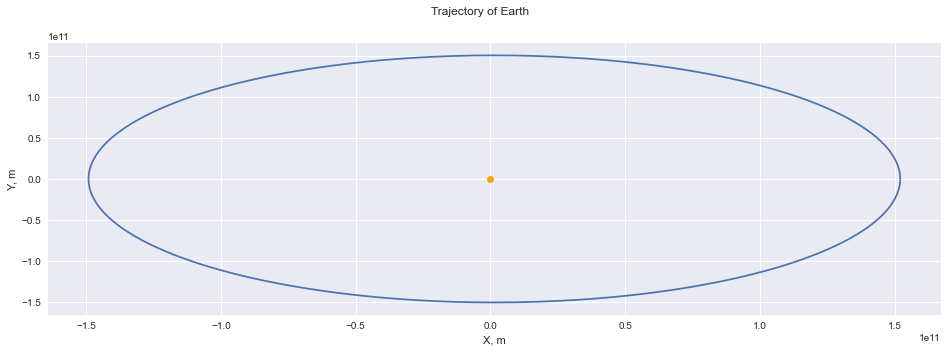

In [6]:
t_0 = 0.; T = 368*24*60*60 
M = 365
tau = (T - t_0) / M # step == day

u = np.zeros((M + 1, 4))
u[0,0] =  152*10**6*1000.
u[0,1] = 0.; 
u[0,2] = 0.
u[0,3] = 29.4*1000;
u = erk4(u, tau, M, Mass, G, modeling)

x = u[:, 0]
y = u[:, 1]
plot_trajectory(x, y)

In [7]:
U, R, R_relat, p_eff = richerdson_simple(M, t_0, T, modeling, p=4, S=5)


<ipython-input-5-35f7257cc316>:29: RuntimeWarning: divide by zero encountered in log
  p_eff.append(np.log(R[s-1]/R[s])/np.log(r))


1
2
3
4


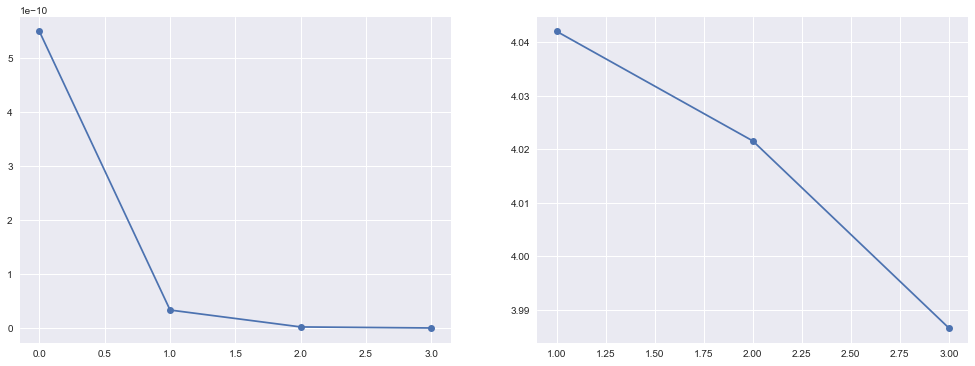

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(17, 6))

ax[0].plot(R_relat, '-o')
ax[1].plot(p_eff, '-o')
plt.show()

## Comet modeling

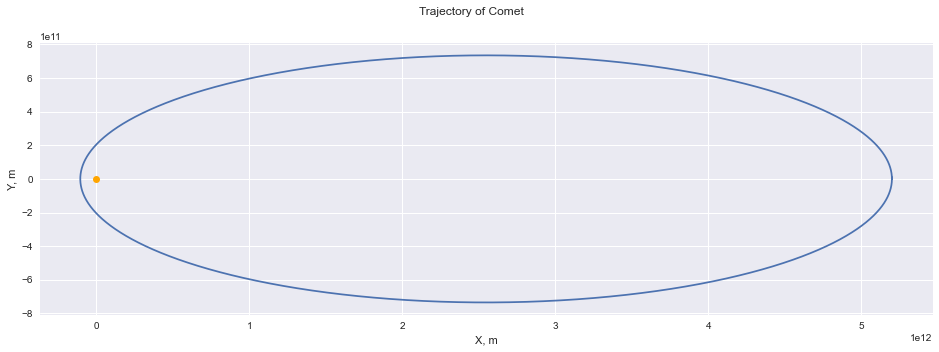

In [9]:
t_0 = 0.; T = 75*365*24*60*60 
M = 75*365
tau = (T - t_0) / M # step == day


u = np.zeros((M + 1, 4))
u[0,0] = 5.2*10**9*1000 # x
u[0,1] = 0. #  y
u[0,2] = 0. #  Vx
u[0,3] = 1000 # Vy
u = erk4(u, tau, M, Mass, G, modeling)

x = u[:, 0]
y = u[:, 1]
plot_trajectory(x, y, name='Comet')

In [10]:
U, R, R_relat, p_eff = richerdson_simple(M, t_0, T, modeling, p=4, S=5)



<ipython-input-5-35f7257cc316>:29: RuntimeWarning: divide by zero encountered in log
  p_eff.append(np.log(R[s-1]/R[s])/np.log(r))


1
2
3
4


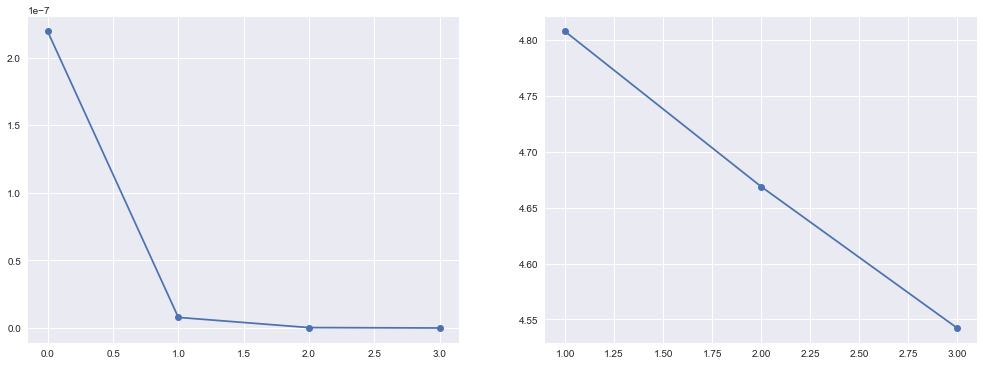

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(17, 6))

ax[0].plot(R_relat, '-o')
ax[1].plot(p_eff, '-o')
plt.show()